# 1. ÎÑ§Ïù¥Î≤ÑÎâ¥Ïä§ ÌÅ¨Î°§ÎßÅ ÎåìÍ∏ÄÎ∂ÑÏÑù

#### ÎÑ§Ïù¥Î≤ÑÎâ¥Ïä§Í≤ÄÏÉâ  "Î∂ÄÎèôÏÇ∞Îß§Îß§"  ÌÅ¨Î°§ÎßÅ  ÌÉúÍ∑∏"class=news_tit" Ï†úÎ™©Í≥º ÎßÅÌÅ¨Ï£ºÏÜå Ï∂îÏ∂ú

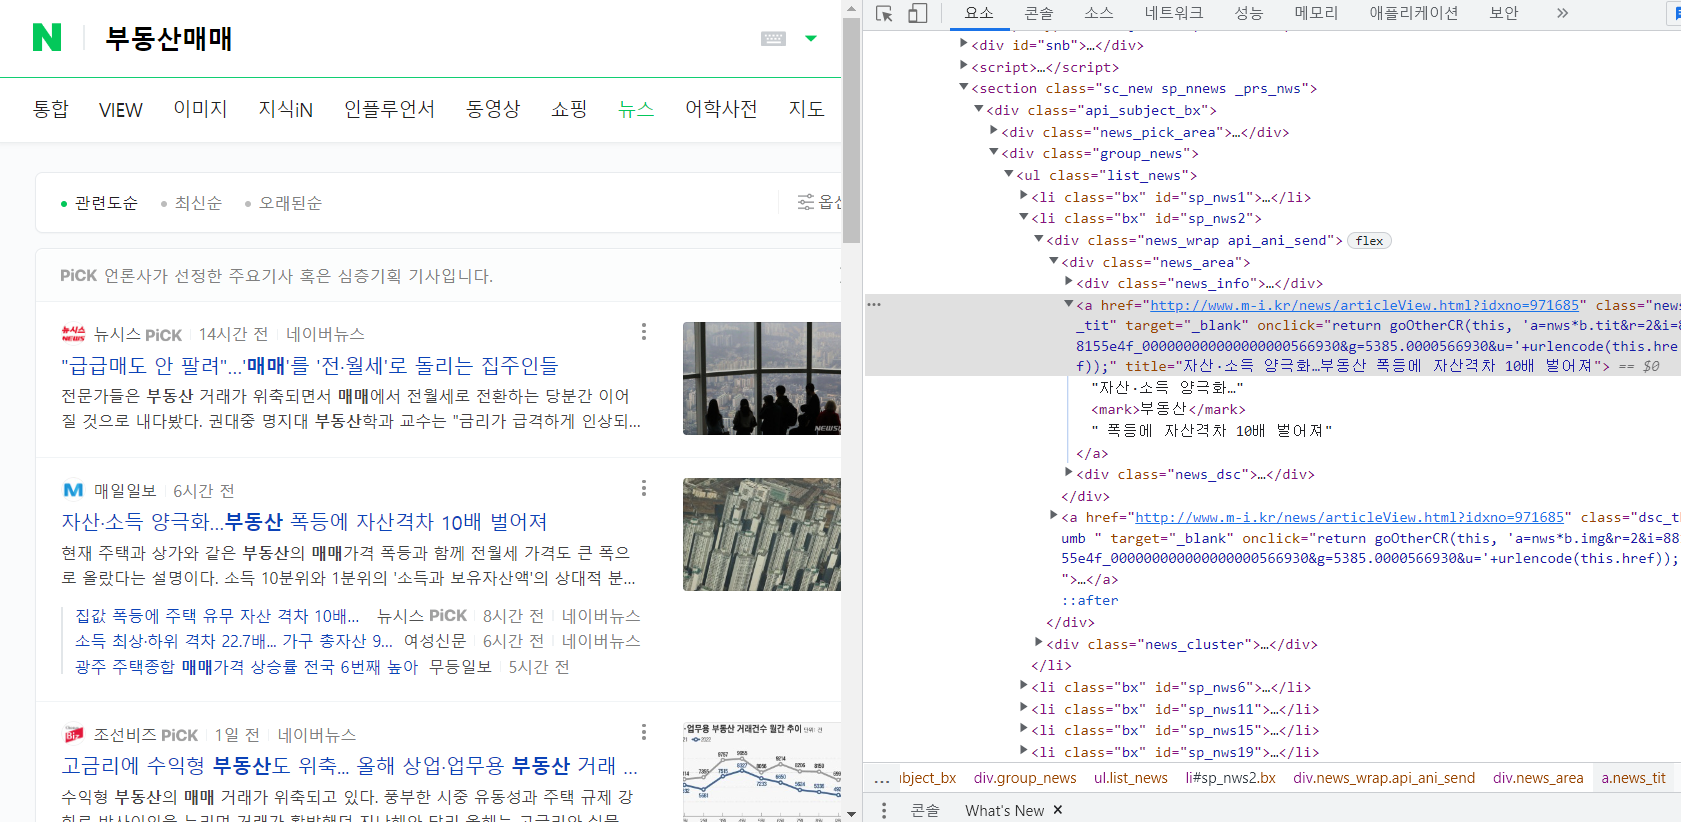

### ÎÑ§Ïù¥Î≤ÑÎâ¥Ïä§ ÌÅ¨Î°§ÎßÅ - Ï†úÎ™©Í≥º ÎßÅÌÅ¨Ï£ºÏÜå Ï∂îÏ∂ú

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import sys
import pprint
import csv
import json
import pandas as pd

result=[]

headers = {
    'authority': 'apis.naver.com',
    'accept': '*/*',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    'referer': 'https://n.news.naver.com/article/028/0002595736',
    'sec-ch-ua': '"Whale";v="3", " Not;A Brand";v="99", "Chromium";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'script',
    'sec-fetch-mode': 'no-cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.108 Whale/3.15.136.18 Safari/537.36',
}

def news_url(query):
    page =1 
    url_list=[]
    while page <= 151 :

        url = "https://m.search.naver.com/search.naver?where=m_news&sm=tab_pge&query="+query+"&sort=0&photo=0&field=0&pd=1&ds=&de=&cluster_rank=129&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1w,a:all&start="+str(page)
        response = requests.get(url,headers=headers)
        html = response.text

        #BeautifulSoup Ïù∏ÏûêÍ∞í ÏßÄÏ†ï
        soup = BeautifulSoup(html, "lxml")
        # print(soup.select('a.news_tit')[3]['href'])
        #<a>ÌÉúÍ∑∏ÏóêÏÑú Ï†úÎ™©Í≥º ÎßÅÌÅ¨Ï£ºÏÜå Ï∂îÏ∂ú
        atags = soup.select('.news_tit') 
        # print(len(atags))
        
        for i in atags:
            if "https://n.news.naver.com/" in i['href'] :
                url_list.append(i['href'])   #ÎßÅÌÅ¨Ï£ºÏÜå
                # print(i['href'])
        if len(atags) < 10 : #ÌïúÌéòÏù¥ÏßÄÏóê 10Í∞úÏù¥Î©∞, Í∑∏Î≥¥Îã§ ÏûëÏúºÎ©¥ ÏóÜÎã§Í≥† ÌåêÎã®
            break
        page = page + 10
    return url_list
    # ÏúÑÏóêÏÑú ÌÅ¨Î°§ÎßÅÌïú ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§ urlÏùÑ ÏûÖÎ†•Ìï©ÎãàÎã§.

### Îâ¥Ïä§Í∏∞ÏÇ¨ ÎåìÍ∏Ä Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò

In [3]:
def comment(url_list):
    total_comment = [] #Î™®Îì† ÎåìÍ∏ÄÏùÑ Îã¥Îäî Î¶¨Ïä§Ìä∏
    for url_ex in url_list:
        url = url_ex
        url = url.split('?')[0]
        oid_1 = url.split('/')[-1]
        oid_2 = url.split('/')[-2]
        i = 1
        # df = pd.DataFrame(columns=['ÎåìÍ∏Ä'])

        while True:
            params = {
                'ticket': 'news',
                'templateId': 'default_society',
                'pool': 'cbox5',
                'lang': 'ko',
                'country': 'KR',
                'objectId': f'news{oid_2},{oid_1}',
                'pageSize': '100',
                'indexSize': '10',
                'page': str(i),
                'currentPage': '0',
                'moreParam.direction': 'next',
                'moreParam.prev': '10000o90000op06guicil48ars',
                'moreParam.next': '1000050000305guog893h1re',
                'followSize': '100',
                'includeAllStatus': 'true',
            }

            response = requests.get('https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json', params=params, headers=headers)
            response.encoding = "UTF-8-sig"
            res = response.text.replace("_callback(","")[:-2]
            temp=json.loads(res) 
            # print(temp)
            try : 
                comment = list(pd.DataFrame(temp['result']['commentList'])['contents'])
                for j in range(len(comment)):
                    total_comment.append(comment[j])
                if len(comment)<97: 
                    break 
                else: 
                    i+=1
            except :
                break    

    print(total_comment)
    return total_comment

### "Î∂ÄÎèôÏÇ∞Îß§Îß§ " Îâ¥Ïä§ Í≤ÄÏÉâÏñ¥ ÏûÖÎ†•

In [4]:
# # Ïã§ÌñâÌï®Ïàò
def main():
    query = input("Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• : ")  
    url_list = news_url(query)  
    allCommetns = comment(url_list)

query = input("Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• : ")  #Î∂ÄÎèôÏÇ∞Îß§Îß§ 
url_list = news_url(query)  
allCommetns = comment(url_list)

Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• : Î∂ÄÎèôÏÇ∞Îß§Îß§
['Í∏∞ÏûêÏïº.ÏÇ¨Í∏∞ÏπòÏßÄÎßàÎùº,.,Îß§Îß§, Ï†ÑÏÑ∏ ÎÑòÏ≥êÎÇúÎã§....Îß§Îß§Îäî 7Í∞úÏõîÏß∏ Ìè≠ÎùΩÏ§ëÏù¥Í≥†~~Ï†ÑÏÑ∏Î¨ºÍ±¥  ÎÑòÏ≥êÎÇòÍ≥†~~~ÏõîÏÑ∏ÎèÑ Ïù¥Ï†ú Îï°Ïù¥Ïïº~~ ~ Ïã§Ï†ú Î™®Îì†Í±∞  ÏñºÏñ¥Î∂ôÏñ¥ ÏàòÏöîÍ∞Ä ÏóÜÎã§', 'ÏßëÏ£ºÏù∏Îì§Ïù¥ ÏóÑÏ≤≠ Ï∞©Í∞ÅÏùÑ ÌïòÍ≥† ÏûàÏäµÎãàÎã§. ÏßÄÍ∏à Ìò∏Í∞ÄÍ∞Ä ÎßêÎèÑ ÏïàÎêòÎäî Í±∞Ìíà Í∞ÄÍ≤©ÏûÑÏùÑ Ï†ÑÌòÄ Íπ®Îã´ÏßÄ Î™ªÌïòÍ≥† ÏûêÍ∏∞ ÏïÑÌååÌä∏Í∞Ä Î¨¥Ïä® Ïã†Ï£ºÎã®ÏßÄÎÇò ÎêòÎäî Í≤ÉÏ≤òÎüº ÎßêÎèÑ ÏïàÎêòÎäî Í∞ÄÍ≤©ÏùÑ Ï†úÏãúÌïòÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏ÎèôÏïà ÏÉÅÏãùÏàòÏ§ÄÏùÑ Îõ∞Ïñ¥ÎÑòÍ≤å Ïò¨ÎûêÎçòÍ±¥ ÏûäÏñ¥Î≤ÑÎ¶¨ÏÖ®ÎÇò Î¥ÖÎãàÎã§. ÌååÏßÅÏπ¥ ÎùºÎäî ÏïÑÌååÌä∏ÏßÅÍ±∞ÎûòÏπ¥Ìéò Í∞ÄÎ≥¥ÏÑ∏Ïöî. ÏïÑÌååÌä∏Í∏âÎß§Î¨º ÏèüÏïÑÏßÄÍ≥† Í∏âÎß§Îßå Í±∞Îûò Îê©ÎãàÎã§. Í∑∏Í∞Ñ ÏßëÍ∞íÏù¥ Ïû¨Ïïô ÏàòÏ§ÄÏù∏Í±¥ ÌôïÏã§ÌïòÎÑ§Ïöî.', 'Ïò§ÎäòÏù¥  ÏµúÍ≥†Í∞Ä  ÏûÖÎãàÎã§ „Ö†„Ö† 4„Ö°5ÎÖÑ  Ï≠âÌïòÎùΩÏù¥Îã§', 'Í∏∞ÏûêÎäî Í∏∞ÏÇ¨Î•º Ï†úÎåÄÎ°ú ÏçºÏúºÎ©¥ Ï¢ãÍ≤†Îã§. Ïñ¥Îñ§Í≤å ÌóêÍ∞íÏóî ÏïàÌåîÍ≤†Îã®Í±¥ÏßÄ ÎèÑÏ†ÄÌûà Ïù¥Ìï¥Í∞Ä ÏïàÎêúÎã§. ÌùëÏÑùÎèôÍ≥º Î≥∏ÎèôÎì± 10ÎÖÑÏù¥ÎÇ¥ ÏïÑÌååÌä∏Îäî Ï†ÑÏÑ∏Í∞íÏù

In [5]:
# Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏÇΩÏûÖ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### "Î∂ÄÎèôÏÇ∞Îß§Îß§_202212. csv" ÌååÏùºÏ†ÄÏû•

In [6]:
# ÎßåÎì† Î¶¨Ïä§Ìä∏ -> Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
cols_name = ["reply"]
total_data = pd.DataFrame(allCommetns,columns=cols_name)

csv_file = total_data.to_csv('Î∂ÄÎèôÏÇ∞Îß§Îß§202212.csv',encoding='utf-8-sig')

print(len(total_data))
total_data[:5]

3960


reply
0  Í∏∞ÏûêÏïº.ÏÇ¨Í∏∞ÏπòÏßÄÎßàÎùº,.,Îß§Îß§, Ï†ÑÏÑ∏ ÎÑòÏ≥êÎÇúÎã§....Îß§Îß§Îäî 7Í∞úÏõîÏß∏ Ìè≠ÎùΩÏ§ëÏù¥Í≥†~~Ï†ÑÏÑ∏...
1  ÏßëÏ£ºÏù∏Îì§Ïù¥ ÏóÑÏ≤≠ Ï∞©Í∞ÅÏùÑ ÌïòÍ≥† ÏûàÏäµÎãàÎã§. ÏßÄÍ∏à Ìò∏Í∞ÄÍ∞Ä ÎßêÎèÑ ÏïàÎêòÎäî Í±∞Ìíà Í∞ÄÍ≤©ÏûÑÏùÑ Ï†ÑÌòÄ...
2                       Ïò§ÎäòÏù¥  ÏµúÍ≥†Í∞Ä  ÏûÖÎãàÎã§ „Ö†„Ö† 4„Ö°5ÎÖÑ  Ï≠âÌïòÎùΩÏù¥Îã§
3  Í∏∞ÏûêÎäî Í∏∞ÏÇ¨Î•º Ï†úÎåÄÎ°ú ÏçºÏúºÎ©¥ Ï¢ãÍ≤†Îã§. Ïñ¥Îñ§Í≤å ÌóêÍ∞íÏóî ÏïàÌåîÍ≤†Îã®Í±¥ÏßÄ ÎèÑÏ†ÄÌûà Ïù¥Ìï¥Í∞Ä ÏïàÎêú...
4                            Ïßë Îß§Îß§Ïùò ÎåÄÎ∂ÄÎ∂ÑÏùÄ Ìà¨Ïûê.Ìà¨Í∏∞ ÎïåÎ¨∏Ïù¥ÏóàÎã§Îäî

### Counter ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö©Ìï¥ ÏÉÅÏúÑÏñ¥ ÎπàÎèÑ Î∂ÑÏÑùÌïòÍ∏∞

In [10]:
from collections import Counter
b= Counter(allCommetns)
print(b)

Counter({'': 543, 'ÏïÑÏßÅ Î©ÄÏóàÎã§.': 4, '5ÏñµÏù¥ Ï†ÅÎãπÌïòÎã§': 4, 'ÏïÑÏßÅ Î©ÄÏóàÎã§': 4, 'ÎØºÏ£ºÎãπÏùÑ Î™∞ÏÇ¥ ÏãúÏºúÏïº ÎÇòÎùºÍ∞Ä Î∞îÎ°ú ÏÑ§Í≤ÉÏúºÎ°ú\nÎ≥¥ÏûÑ..ÎÇ¥Í∞Ä Í≥ºÌï¥  Î≥¥Ïù¥ÎÇò? Ï†ÄÎì§Ïù¥  Ïù¥ÎÅà 5ÎÖÑÏù¥\nÍ≥ºÌï¥ Î≥¥Ïù∏Îã§': 4, '2Ï∞çÎì§ Ï¢ãÏïÑÏ£ΩÍ≤†ÎÑ§': 4, 'ÏßÄÍ∏àÏÇ¨Î©¥ÎèàÎ≤àÎã§ ÏùÄÎßàÎäî Í∑ºÎç∞ Îß§Î¨ºÏù¥ÏûàÏùÑÍπå': 4, 'ÎØÑÏ£ÑÏïôÏù¥ Í∞úÌè≠Îì± ÏãúÌÇ® Í±∞ÌíàÏù¥ Í∫ºÏßÄÎäîÏ§ë': 4, 'Îçî Îñ®Ïñ¥Ï†∏Îùº~~~ ÏßÄÎ∞©ÏùÄ 5ÏñµÏù¥Î©¥ 40ÌèâÎåÄ Î°ØÎç∞Ï∫êÏä¨ ÏÇ∞Îã§! ÏÑúÏö∏ Î≥ÄÎëêÎ¶¨ÎèÑ Ïò§ÎûòÎêú Î≥µÎèÑÏãù ÏïÑÌååÌä∏ 20ÌèâÎåÄÍ∞Ä 7~8ÏñµÏù¥ÏóàÎã§. ÏßëÏù¥ ÏßëÏù¥Ïñ¥ÏïºÏßÄ...': 4, 'ÏΩîÎ°úÎÇòÏóÜÏóàÎã§Î©¥ ÏùºÏñ¥ÎÇòÏßÄÎèÑÏïäÏïòÏùÑ Ïùº': 4, 'Ï≤òÏùå ÏÇ¥Îïê ÏñºÎßàÏù∏Îç∞': 4, 'Îçî Îñ®Ïñ¥Ï†∏ÏïºÏ†ïÏÉÅÏù¥Í≥† Îçî Îñ®Ïñ¥ÏßàÍ≤ÅÎãàÎã§.Î™áÎÖÑÍ∞ÑÏùÄ ÏßëÏÇ¨ÎäîÍ±¥ Î∞îÎ≥¥Ï£† „Öé': 4, '19, 20, 21, 22ÎÖÑÍπåÏßÄ Í±∞Ïùò 300Îßå Í∞ÄÍπåÏù¥Í∞Ä ÏßëÏùÑ ÏÇ¨ÏïºÌïòÎäîÎç∞ Ïù∏ÏÉùÏµúÎåÄ ÌòàÏïàÏù¥ ÎêòÏñ¥ÏÑú Ï†ïÎßê Í¥ëÏ†ÅÏúºÎ°ú Íµ¨Îß§ÌñàÏóàÏ£†. Í∑∏Îì§ÏùÑ Íµ¨Ï†úÌïòÎäî Í≤ÉÏùÄ Ïù¥Ï†ú ÎçîÏù¥ÏÉÅ ÏùòÎØ∏Í∞Ä ÏóÜÏäµÎãàÎã§. ÎÇòÎ®∏ÏßÄ ÏÇ¨ÎûåÎì§Ïùò Ï

In [7]:
from konlpy.tag import Okt
from konlpy.tag import Twitter

In [13]:
twt = Twitter()

In [12]:
convert_string =''.join(b)  # stringÎ°ú Î≥ÄÌôò
#print(convert_string)
#type(convert_string)

### ÌòïÌÉúÏÜåÎ∂ÑÏÑùÏúºÎ°ú Î¨∏Ïû• Î∂ÑÌï¥  (Îã®Ïñ¥  : ÌíàÏÇ¨)

In [15]:
tagging = twt.pos(convert_string)

In [16]:
tagging

[('Í∏∞Ïûê', 'Noun'),
 ('Ïïº', 'Josa'),
 ('.', 'Punctuation'),
 ('ÏÇ¨Í∏∞ÏπòÏßÄÎßàÎùº', 'Verb'),
 (',.,', 'Punctuation'),
 ('Îß§Îß§', 'Noun'),
 (',', 'Punctuation'),
 ('Ï†ÑÏÑ∏', 'Noun'),
 ('ÎÑòÏ≥ê', 'Adjective'),
 ('ÎÇúÎã§', 'Verb'),
 ('....', 'Punctuation'),
 ('Îß§Îß§', 'Noun'),
 ('Îäî', 'Josa'),
 ('7', 'Number'),
 ('Í∞úÏõî', 'Noun'),
 ('Ïß∏', 'Suffix'),
 ('Ìè≠ÎùΩ', 'Noun'),
 ('Ï§ë', 'Suffix'),
 ('Ïù¥Í≥†', 'Josa'),
 ('~~', 'Punctuation'),
 ('Ï†ÑÏÑ∏', 'Noun'),
 ('Î¨ºÍ±¥', 'Noun'),
 ('ÎÑòÏ≥êÎÇòÍ≥†', 'Adjective'),
 ('~~~', 'Punctuation'),
 ('ÏõîÏÑ∏', 'Noun'),
 ('ÎèÑ', 'Josa'),
 ('Ïù¥Ï†ú', 'Noun'),
 ('Îï°', 'Noun'),
 ('Ïù¥Ïïº', 'Josa'),
 ('~~', 'Punctuation'),
 ('~', 'Punctuation'),
 ('Ïã§Ï†ú', 'Noun'),
 ('Î™®Îì†', 'Modifier'),
 ('Í±∞', 'Noun'),
 ('ÏñºÏñ¥Î∂ôÏñ¥', 'Verb'),
 ('ÏàòÏöî', 'Noun'),
 ('Í∞Ä', 'Josa'),
 ('ÏóÜÎã§', 'Adjective'),
 ('ÏßëÏ£ºÏù∏', 'Noun'),
 ('Îì§', 'Suffix'),
 ('Ïù¥', 'Josa'),
 ('ÏóÑÏ≤≠', 'Adverb'),
 ('Ï∞©Í∞Å', 'Noun'),
 ('ÏùÑ', 'Josa'),
 ('ÌïòÍ≥†', 'Verb'),
 ('ÏûàÏäµÎãà

In [17]:
c= Counter(tagging)
print(c)

Counter({('.', 'Punctuation'): 1397, ('Ïù¥', 'Josa'): 894, ('Í∞Ä', 'Josa'): 629, ('Îì§', 'Suffix'): 588, ('Ïóê', 'Josa'): 514, ('ÏùÄ', 'Josa'): 483, ('?', 'Punctuation'): 473, ('ÎèÑ', 'Josa'): 416, ('ÏùÑ', 'Josa'): 408, ('Îäî', 'Josa'): 386, ('\n', 'Foreign'): 360, (',', 'Punctuation'): 339, ('ÏïÑÌååÌä∏', 'Noun'): 289, ('ÏúºÎ°ú', 'Josa'): 288, ('..', 'Punctuation'): 274, ('ÏßëÍ∞í', 'Noun'): 259, ('Î∂ÄÎèôÏÇ∞', 'Noun'): 252, ('Îçî', 'Noun'): 226, ('Ïùò', 'Josa'): 223, ('Î°ú', 'Josa'): 212, ('...', 'Punctuation'): 211, ('Î•º', 'Josa'): 204, ('Í∞ÄÍ≤©', 'Noun'): 169, ('Ïßë', 'Noun'): 166, ('Îßå', 'Josa'): 163, ('Îã§', 'Adverb'): 163, ('ÏÇ¨Îûå', 'Noun'): 152, ('Ìà¨Í∏∞', 'Noun'): 148, ('Í≥†', 'Josa'): 142, ('!', 'Punctuation'): 137, ('18Ïñµ', 'Number'): 134, ('Ïù¥Îã§', 'Josa'): 126, ('~', 'Punctuation'): 124, ('Îèà', 'Noun'): 122, ('Îïå', 'Noun'): 121, ('Ï†Å', 'Suffix'): 121, ('Í≤É', 'Noun'): 120, ('ÏóêÏÑú', 'Josa'): 120, ('Ïïà', 'VerbPrefix'): 118, ('ÏßÄÍ∏à', 'Noun'): 117, ('Î∂ÑÏñë', 'Noun')

### Î™ÖÏÇ¨ ÏÉÅÏúÑ50Í∞ú Ï∂îÏ∂ú

In [18]:
okt = Okt()
noun = okt.nouns(convert_string)
count = Counter(noun)

noun_list = count.most_common(50)
for v in noun_list:
    print(v)

('ÏïÑÌååÌä∏', 289)
('ÏßëÍ∞í', 259)
('Î∂ÄÎèôÏÇ∞', 252)
('Îçî', 226)
('Í∞ÄÍ≤©', 169)
('Ïßë', 166)
('ÏÇ¨Îûå', 152)
('Ìà¨Í∏∞', 148)
('Îèà', 122)
('Îïå', 121)
('Í≤É', 120)
('ÏßÄÍ∏à', 117)
('Î∂ÑÏñë', 110)
('Ï†ïÏÉÅ', 109)
('Îßê', 108)
('Í∏àÎ¶¨', 108)
('Ïù¥', 100)
('ÌïòÎùΩ', 99)
('Í±∞Ìíà', 97)
('Ï£ºÌÉù', 91)
('Ïù¥Ï†ú', 84)
('Ï†ïÎ∂Ä', 84)
('ÏÑúÏö∏', 82)
('Ï†ÑÏÑ∏', 77)
('Í∑úÏ†ú', 77)
('Ìèâ', 76)
('Í∏∞ÏÇ¨', 75)
('Í≤∞Ìòº', 74)
('Î≠ê', 69)
('Í±∞', 67)
('Ï¢Ä', 67)
('ÎÇòÎùº', 64)
('Íµ≠ÎØº', 64)
('ÎåÄÏ∂ú', 64)
('ÏÉùÍ∞Å', 63)
('Ïôú', 62)
('Î¨∏Ïû¨Ïù∏', 62)
('Í∞ïÎÇ®', 61)
('ÏãúÏûë', 60)
('Ïû¨Ïïô', 58)
('ÎÇ¥ÎÖÑ', 58)
('Î¨∏Ï†ú', 57)
('Í∑∏', 57)
('Í∞í', 55)
('ÎïåÎ¨∏', 54)
('ÏÑ∏Í∏à', 54)
('Í±∞Îûò', 53)
('Ï†ïÍ∂å', 52)
('Í±¥ÏÑ§', 50)
('Ïïû', 48)


In [19]:
import nltk
from nltk.stem.porter import PorterStemmer  
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords 

In [20]:
#Ï†ïÍ∑úÌëúÌòÑÏãù [\w]+Ïóê Ìï¥ÎãπÌïòÎäî ÎÇ¥Ïö©ÏúºÎ°ú tokenize Ïã§Ìñâ

tokenizer = RegexpTokenizer('[\w]+')

In [21]:
stop_words = stopwords.words('english')  #ÏßëÍ≥ÑÏ†úÏô∏ Îã®Ïñ¥

In [22]:
tokens = tokenizer.tokenize(convert_string)

In [24]:
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1] #ÎπàÏπ∏Ï†úÍ±∞ 1Î≥¥Îã§ ÏûëÏúºÎ©¥ Ï†úÍ±∞ Îúª

In [25]:
stopped_tokens2

['Í∏∞ÏûêÏïº',
 'ÏÇ¨Í∏∞ÏπòÏßÄÎßàÎùº',
 'Îß§Îß§',
 'Ï†ÑÏÑ∏',
 'ÎÑòÏ≥êÎÇúÎã§',
 'Îß§Îß§Îäî',
 '7Í∞úÏõîÏß∏',
 'Ìè≠ÎùΩÏ§ëÏù¥Í≥†',
 'Ï†ÑÏÑ∏Î¨ºÍ±¥',
 'ÎÑòÏ≥êÎÇòÍ≥†',
 'ÏõîÏÑ∏ÎèÑ',
 'Ïù¥Ï†ú',
 'Îï°Ïù¥Ïïº',
 'Ïã§Ï†ú',
 'Î™®Îì†Í±∞',
 'ÏñºÏñ¥Î∂ôÏñ¥',
 'ÏàòÏöîÍ∞Ä',
 'ÏóÜÎã§ÏßëÏ£ºÏù∏Îì§Ïù¥',
 'ÏóÑÏ≤≠',
 'Ï∞©Í∞ÅÏùÑ',
 'ÌïòÍ≥†',
 'ÏûàÏäµÎãàÎã§',
 'ÏßÄÍ∏à',
 'Ìò∏Í∞ÄÍ∞Ä',
 'ÎßêÎèÑ',
 'ÏïàÎêòÎäî',
 'Í±∞Ìíà',
 'Í∞ÄÍ≤©ÏûÑÏùÑ',
 'Ï†ÑÌòÄ',
 'Íπ®Îã´ÏßÄ',
 'Î™ªÌïòÍ≥†',
 'ÏûêÍ∏∞',
 'ÏïÑÌååÌä∏Í∞Ä',
 'Î¨¥Ïä®',
 'Ïã†Ï£ºÎã®ÏßÄÎÇò',
 'ÎêòÎäî',
 'Í≤ÉÏ≤òÎüº',
 'ÎßêÎèÑ',
 'ÏïàÎêòÎäî',
 'Í∞ÄÍ≤©ÏùÑ',
 'Ï†úÏãúÌïòÍ≥†',
 'ÏûàÏäµÎãàÎã§',
 'Í∑∏ÎèôÏïà',
 'ÏÉÅÏãùÏàòÏ§ÄÏùÑ',
 'Îõ∞Ïñ¥ÎÑòÍ≤å',
 'Ïò¨ÎûêÎçòÍ±¥',
 'ÏûäÏñ¥Î≤ÑÎ¶¨ÏÖ®ÎÇò',
 'Î¥ÖÎãàÎã§',
 'ÌååÏßÅÏπ¥',
 'ÎùºÎäî',
 'ÏïÑÌååÌä∏ÏßÅÍ±∞ÎûòÏπ¥Ìéò',
 'Í∞ÄÎ≥¥ÏÑ∏Ïöî',
 'ÏïÑÌååÌä∏Í∏âÎß§Î¨º',
 'ÏèüÏïÑÏßÄÍ≥†',
 'Í∏âÎß§Îßå',
 'Í±∞Îûò',
 'Îê©ÎãàÎã§',
 'Í∑∏Í∞Ñ',
 'ÏßëÍ∞íÏù¥',
 'Ïû¨Ïïô',
 'ÏàòÏ§ÄÏù∏Í±¥',
 'ÌôïÏã§ÌïòÎÑ§Ïöî',
 'Ïò§ÎäòÏù¥',
 'ÏµúÍ≥†Í∞Ä',
 'ÏûÖÎãàÎã§',
 '„Ö†„Ö†',
 '4„Ö°5ÎÖÑ',

In [26]:
pd.Series(stopped_tokens2).value_counts().head(10)

Î∂ÄÎèôÏÇ∞     119
ÏßëÍ∞í      102
ÏïÑÌååÌä∏      78
ÏïÑÏßÅ       67
Ïù¥Ï†ú       64
ÏßÄÍ∏à       59
ÏïÑÏßÅÎèÑ      53
18Ïñµ      50
Îñ®Ïñ¥Ï†∏Ïïº     47
ÏßëÍ∞íÏù¥      47
dtype: int64

### Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ÌëúÌòÑ

In [28]:
ko = nltk.Text(stopped_tokens2)

In [29]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

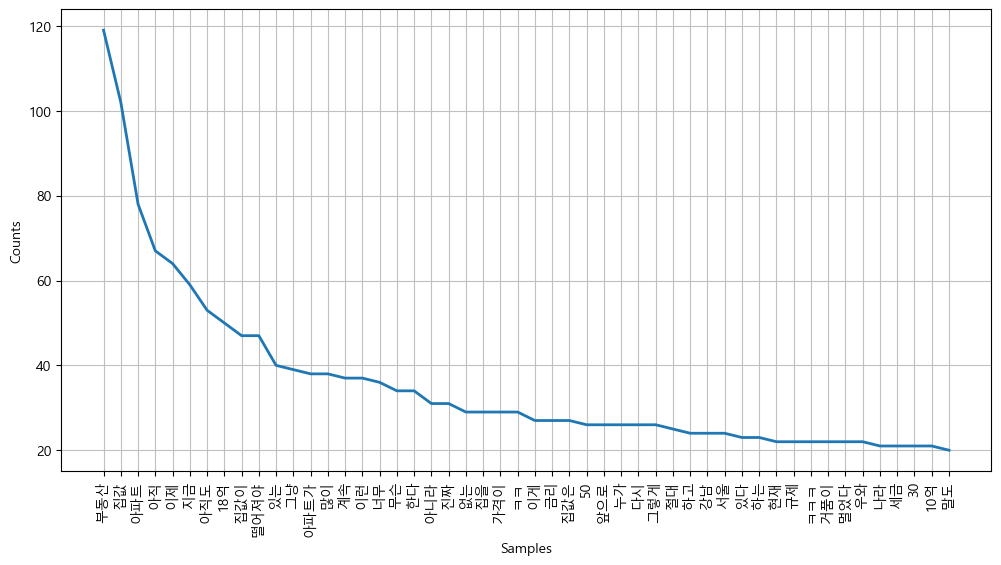

In [30]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

### Î∂àÏö©Ïñ¥ Ï†úÍ±∞

In [35]:
stop_words = ['Ïïº','ÎèÑ','Ïù¥Îü∞','Ïù¥Í≤å','ÏúÑ','ÌïòÎäî','Îßê','50','Î°ú','Ïû¨Ïïô','„Öã„Öã','„Öã„Öã„Öã','Îçî','Ïî®','Í≤É','ÎÇ†','Îì±','Îïå','ÎÇòÎùº','ÏúÑÌï¥','Ïö∞ÏôÄ','Îçî','Í±¥','Ïù¥Î≤à']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko[1]

'ÏÇ¨Í∏∞ÏπòÏßÄÎßàÎùº'

### Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ Í∑∏ÎûòÌîÑ ÌëúÌòÑ

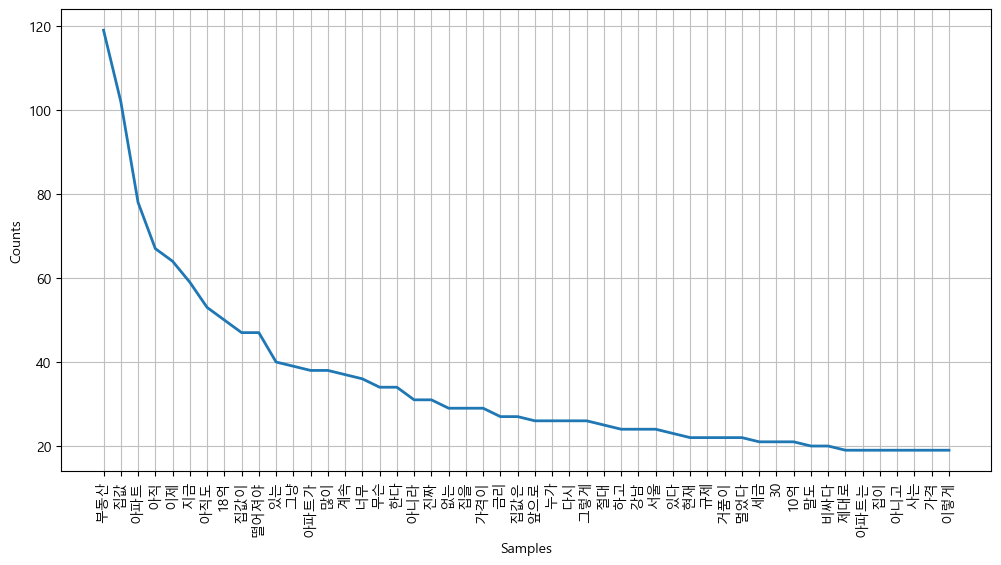

In [36]:
ko = nltk.Text(ko)

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

### ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÌëúÌòÑ

In [39]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [40]:
font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 600,
    height = 600,
    background_color="white"
)

In [41]:
count = Counter(ko)
wordcloud = wordcloud.generate_from_frequencies(count)
get_ipython().run_line_magic('matplotlib','inline')

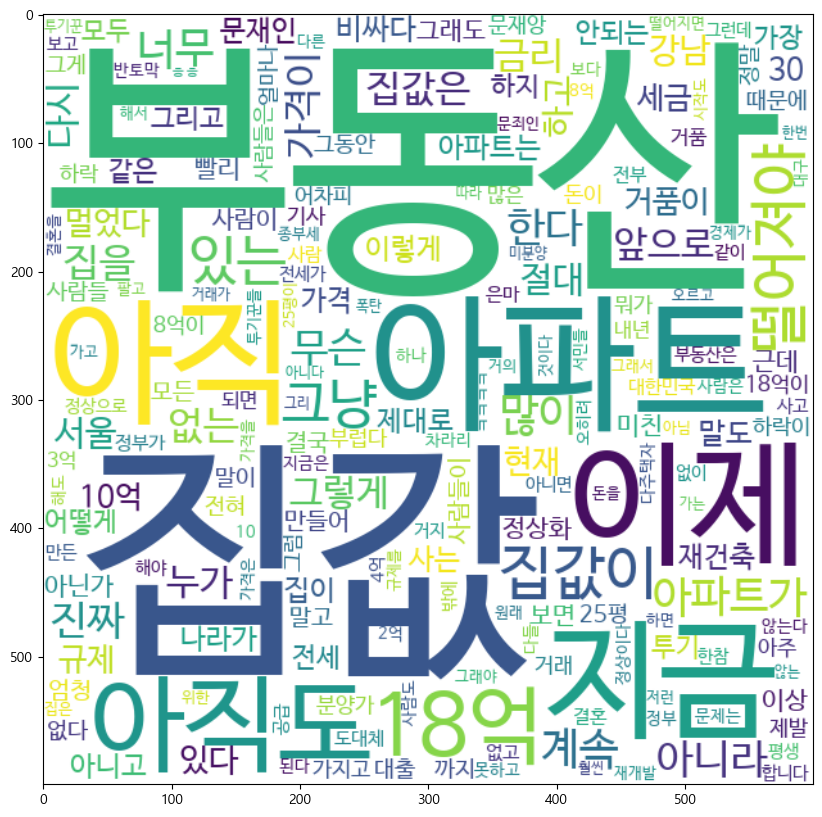

In [42]:
flg = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()   

### <Í≤∞Î°†> 
#### "Î∂ÄÎèôÏÇ∞Îß§Îß§" Îâ¥Ïä§Í≤ÄÏÉâ ÎåìÍ∏Ä Î∂ÑÏÑù Í≤∞Í≥º 
#### Î∂ÄÎèôÏÇ∞ > ÏßëÍ∞í > ÏïÑÌååÌä∏ > Ïù¥Ï†ú  > ÏïÑÏßÅ > Îñ®Ïñ¥Ï†∏Ïïº  ÏàúÏÑúÎ°ú ÎÇòÌÉÄÎÇòÎäî Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏäµÎãàÎã§.